In [1]:
!python -m pip install basemap
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 43.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 67.6 MB/s eta 0:00:00


In [20]:
import mpl_toolkits.basemap
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


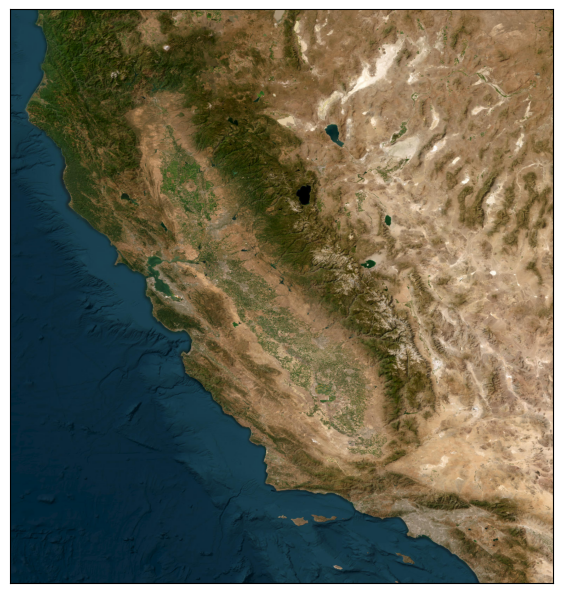

In [3]:
plt.figure(figsize=(7,10))
m = mpl_toolkits.basemap.Basemap(llcrnrlon=-124.6509,llcrnrlat=33,urcrnrlon=-116.1315,urcrnrlat=42.0126,
            resolution='l',epsg=4269)

m.arcgisimage(service='World_Imagery', xpixels = 1000)

In [4]:
import shapefile as shp
import geopandas as gpd
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
%cd '/content/drive/My Drive/00_Research_Projects/GW_attribution/Colab'

/content/drive/My Drive/00_Research_Projects/GW_attribution/Colab


In [7]:
# Read subregions and separate hydrologic regions: Sacramento, San Joaquin and Tulare

# Read the shapefile from Google Drive
shp_path = "CV_subregion.shp"
gdf = gpd.read_file(shp_path)
gdf = gdf.to_crs('EPSG:4326')
gdf_subreg = gdf.copy()

gdf.loc[(gdf['SubRegion'] >= 1) & (gdf['SubRegion'] <= 7), 'HR'] = 'SC'
gdf.loc[(gdf['SubRegion'] >= 8) & (gdf['SubRegion'] <= 8), 'HR'] = 'EB'
gdf.loc[(gdf['SubRegion'] >= 9) & (gdf['SubRegion'] <= 9), 'HR'] = 'DL'
gdf.loc[(gdf['SubRegion'] >= 10) & (gdf['SubRegion'] <= 13), 'HR'] = 'SJ'
gdf.loc[(gdf['SubRegion'] >= 14) & (gdf['SubRegion'] <= 21), 'HR'] = 'TL'


# dissolve by 'HR' column and aggregate the 'area_sqkm' column using 'sum'
dissolved = gdf.dissolve(by='HR', aggfunc='sum')

# reset the index to convert the multi-index back to a regular index
HR = dissolved.reset_index()

# print the dissolved geodataframe
print(HR)

   HR                                           geometry  SubRegion  \
0  DL  POLYGON ((-121.52047 38.59044, -121.51350 38.5...          9   
1  EB  POLYGON ((-121.13365 38.59570, -121.13029 38.5...          8   
2  SC  POLYGON ((-121.33955 39.03076, -121.33597 39.0...         28   
3  SJ  POLYGON ((-120.31192 37.49269, -120.29888 37.4...         46   
4  TL  POLYGON ((-118.71849 35.34551, -118.69826 35.3...        140   

      area_sqkm  
0   2907.634817  
1   3657.179111  
2  15863.247090  
3  10017.610682  
4  21199.918307  


In [8]:
# Read the shapefile from Google Drive
shp_path = "DAR_9lyrs.shp"
gdf_dar = gpd.read_file(shp_path)
gdf_dar = gdf_dar.to_crs('EPSG:4326')

KeyboardInterrupt: ignored

In [10]:
# Read the shapefile from Google Drive
shp_path = "gwpa_leaching.shp"
gdf_gwpa_lch = gpd.read_file(shp_path)
gdf_gwpa_lch = gdf_gwpa_lch.to_crs('EPSG:4326')

In [15]:
gdf_gwpa_lch.head(2)

COUNTY_CD MTOWN RANGE SECTION TOWNSHIP       MTRS      MTR      CO_MTRS  \
0        15  M28S   25E      14      28S  M28S25E14  M28S25E  15M28S25E14   
1        15  M28S   25E      11      28S  M28S25E11  M28S25E  15M28S25E11   

      CO_MTR         SOILCOND  GWPAType GWPA_Year  COUNTY_CD_ COUNTY_NM  \
0  15M28S25E  Medium-Textured  Leaching      2004          15      Kern   
1  15M28S25E               NA  Leaching      2020          15      Kern   

   Shape_Leng  Shape_Area                                           geometry  
0    0.064607    0.000257  POLYGON Z ((-119.25094 35.49971 0.00000, -119....  
1    0.064108    0.000254  POLYGON Z ((-119.24277 35.50838 0.00000, -119....

In [18]:
type(gdf_gwpa_lch)

geopandas.geodataframe.GeoDataFrame

In [16]:
# Read gwpa detection type
gwpa_detect_t = pd.read_csv('gwpa_detect_based.csv')
gwpa_detect_t.head(2)
gwpa_detect_t.GWPATYPE.unique()
gwpa_detect_t.DETECT_BASED.unique()

COUNTY_CD    COUNTY_NM       COMTRS GWPATYPE DETECT_BASED
0         19  Los Angeles  19S01N13W03   Runoff          YES
1         19  Los Angeles  19S01N12W08   Runoff          YES

In [26]:
merged_gwpa_gdf = gdf_gwpa_lch.merge(gwpa_detect_t, left_on='CO_MTRS', right_on='COMTRS')


(-122.82861562897949,
 -118.37998815556801,
 34.62201391872327,
 40.96607315495096)

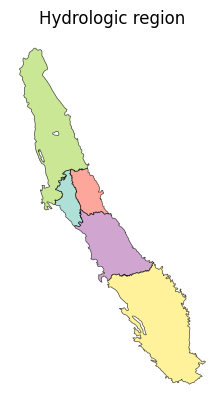

In [ ]:
# Plot the dissolved subregions
ax = HR.plot(column='HR', cmap='Set3', alpha=0.7, linewidth=0.5, edgecolor='black')

# Add a title and remove the axis
ax.set_title('Hydrologic region')
ax.axis('off')

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


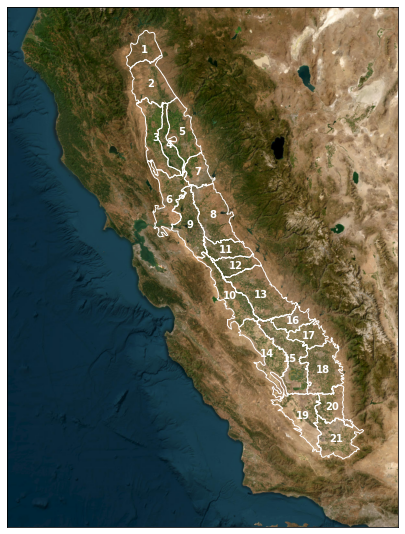

In [ ]:
plt.figure(figsize=(7,10))
# Create a Basemap object
m = Basemap(llcrnrlon=-124.6509,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=41,
                    resolution='l',epsg=4269)

# Add the ArcGIS imagery to the map
m.arcgisimage(service='World_Imagery', xpixels=1000)

# Define a function to add Subregion IDs as annotations to the polygons
def annotate_polygon(row):
    centroid = row['geometry'].centroid
    plt.annotate(text=row['SubRegion'], xy=(centroid.x, centroid.y), color='white',
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=10, fontweight='bold')
    
# Plot the shapefile using geopandas.plot() method
gdf_subreg.plot(ax=plt.gca(), facecolor = 'none', edgecolor='white', linewidth=1)

# Add annotations to each polygon in the plot
gdf_subreg.apply(annotate_polygon, axis=1)

# Show the map
plt.show()

In [ ]:
gdf_subreg.head(2)

SubRegion  HR    area_sqkm  \
0          1  SC  1612.444404   
1          2  SC  2992.667695   

                                            geometry  
0  POLYGON ((-122.25212 40.65636, -122.22531 40.6...  
1  POLYGON ((-122.02908 40.30827, -122.04348 40.3...

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


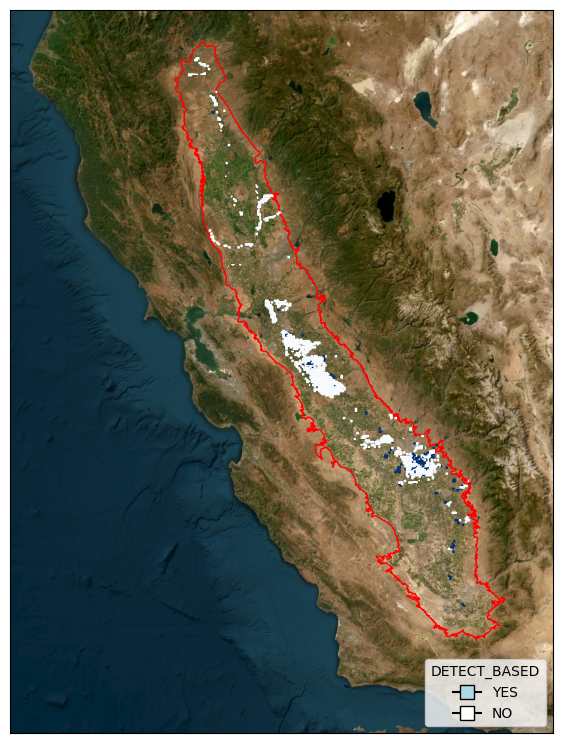

In [33]:
plt.figure(figsize=(7,10))
# Create a Basemap object
m = Basemap(llcrnrlon=-124.6509,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=41,
                    resolution='l',epsg=4269)

# Add the ArcGIS imagery to the map
m.arcgisimage(service='World_Imagery', xpixels=1000)

# Read the shapefile using geopandas.read_file() method
shp_path = "cv.shp"
gdf = gpd.read_file(shp_path)

# Plot the shapefile using geopandas.plot() method
gdf.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=1)

# Plot the merged GeoDataFrame filtered by GWPAType=='Leaching' and color by DETECT_BASED
merged_gwpa_gdf[merged_gwpa_gdf['GWPAType'] == 'Leaching'].plot(column='DETECT_BASED', cmap='Blues', facecolor='none', linewidth=0.8,
                                                      ax=plt.gca())

# Get the current axes and create a legend
ax = plt.gca()
# Create a legend manually
legend_labels = ['YES', 'NO']
legend_colors = ['lightblue', 'white']
legend_handles = [plt.Line2D([], [], marker='s', color='black', markersize=10, markerfacecolor=color)
                  for color in legend_colors]

# Add the legend to the plot
ax.legend(legend_handles, legend_labels, title='DETECT_BASED', loc='lower right')

# Show the map
plt.show()

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


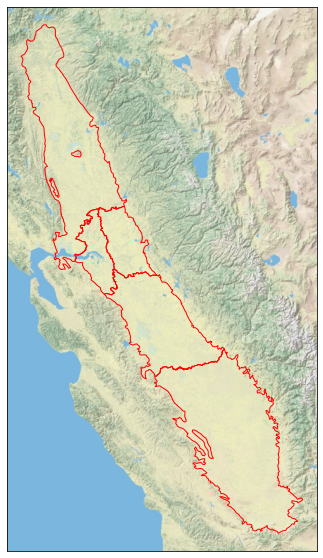

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(7,10))

# Create a Basemap object
m = Basemap(llcrnrlon=HR.total_bounds[0]-.2,llcrnrlat=HR.total_bounds[1]-.2,urcrnrlon=HR.total_bounds[2]+.2,urcrnrlat=HR.total_bounds[3]+.2,
            resolution='l',epsg=4326)

# Add the ArcGIS imagery to the map
# m.arcgisimage(service='World_Imagery', xpixels=1000)

m.arcgisimage(service='World_Physical_Map', xpixels=1000)

# Read the shapefile using geopandas.read_file() method
gdf = HR.copy()

# Plot the shapefile using geopandas.plot() method
gdf.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=1)

# Save the map as a PNG file
plt.savefig('exported_image/study_area_wt_basemap.png', dpi=300, bbox_inches='tight')

# Show the map
plt.show()



In [ ]:
gdf_dar.head(2)

Resistivit  HR  SubRegion                     geometry
0        50.0  TL         21  POINT (-118.93646 34.91218)
1        50.0  TL         21  POINT (-118.93427 34.91216)

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


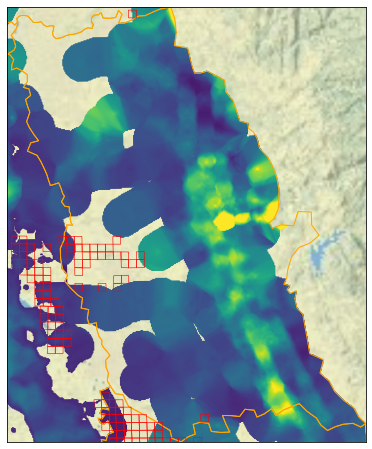

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(15,8))

i = 1 # 3 for san joaquin

# Create a Basemap object
# m = Basemap(llcrnrlon=-124.6509,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=41,
#             resolution='l',epsg=4326)
m = Basemap(llcrnrlon=HR.bounds.iloc[i].minx,llcrnrlat=HR.bounds.iloc[i].miny,urcrnrlon=HR.bounds.iloc[i].maxx,urcrnrlat=HR.bounds.iloc[i].maxy,
            resolution='l',epsg=4326)

# Add the ArcGIS imagery to the map
# m.arcgisimage(service='World_Imagery', xpixels=1000)
# m.arcgisimage(service='NatGeo_World_Map', xpixels=1000)
# m.arcgisimage(service='World_Shaded_Relief', xpixels=1000)
# m.arcgisimage(service='World_Topo_Map', xpixels=1000)
m.arcgisimage(service='World_Physical_Map', xpixels=1000)

out = plt.scatter(
    gdf_dar['geometry'].x, gdf_dar['geometry'].y, c=gdf_dar.Resistivit, 
    s=.7, 
    # cmap=cmap,
    # norm=norm,
    zorder=1
)

# Plot the shapefile using geopandas.plot() method
HR.plot(ax=plt.gca(), facecolor='none', edgecolor='orange', linewidth=1)

# Plot the shapefile using geopandas.plot() method
gdf_gwpa_lch.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=.6)

# Save the map as a PNG file
# plt.savefig('exported_image/study_area_wt_basemap.png', dpi=300, bbox_inches='tight')

# Show the map
plt.show()



/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


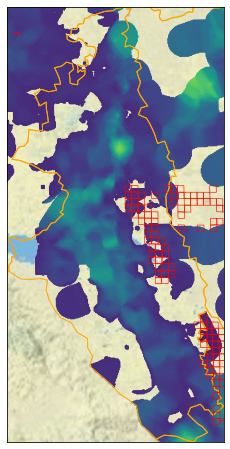

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(15,8))

i = 0 # 3 for san joaquin

# Create a Basemap object
# m = Basemap(llcrnrlon=-124.6509,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=41,
#             resolution='l',epsg=4326)
m = Basemap(llcrnrlon=HR.bounds.iloc[i].minx,llcrnrlat=HR.bounds.iloc[i].miny,urcrnrlon=HR.bounds.iloc[i].maxx,urcrnrlat=HR.bounds.iloc[i].maxy,
            resolution='l',epsg=4326)

# Add the ArcGIS imagery to the map
# m.arcgisimage(service='World_Imagery', xpixels=1000)
# m.arcgisimage(service='NatGeo_World_Map', xpixels=1000)
# m.arcgisimage(service='World_Shaded_Relief', xpixels=1000)
# m.arcgisimage(service='World_Topo_Map', xpixels=1000)
m.arcgisimage(service='World_Physical_Map', xpixels=1000)

out = plt.scatter(
    gdf_dar['geometry'].x, gdf_dar['geometry'].y, c=gdf_dar.Resistivit, 
    s=.7, 
    # cmap=cmap,
    # norm=norm,
    zorder=1
)

# Plot the shapefile using geopandas.plot() method
HR.plot(ax=plt.gca(), facecolor='none', edgecolor='orange', linewidth=1)

# Plot the shapefile using geopandas.plot() method
gdf_gwpa_lch.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=.6)

# Save the map as a PNG file
# plt.savefig('exported_image/study_area_wt_basemap.png', dpi=300, bbox_inches='tight')

# Show the map
plt.show()



/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


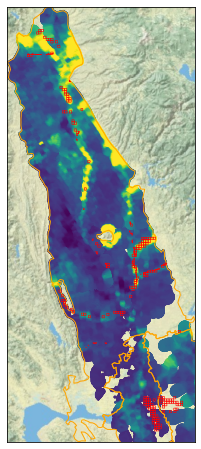

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(15,8))

i = 2 # 3 for san joaquin

# Create a Basemap object
# m = Basemap(llcrnrlon=-124.6509,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=41,
#             resolution='l',epsg=4326)
m = Basemap(llcrnrlon=HR.bounds.iloc[i].minx,llcrnrlat=HR.bounds.iloc[i].miny,urcrnrlon=HR.bounds.iloc[i].maxx,urcrnrlat=HR.bounds.iloc[i].maxy,
            resolution='l',epsg=4326)

# Add the ArcGIS imagery to the map
# m.arcgisimage(service='World_Imagery', xpixels=1000)
# m.arcgisimage(service='NatGeo_World_Map', xpixels=1000)
# m.arcgisimage(service='World_Shaded_Relief', xpixels=1000)
# m.arcgisimage(service='World_Topo_Map', xpixels=1000)
m.arcgisimage(service='World_Physical_Map', xpixels=1000)

out = plt.scatter(
    gdf_dar['geometry'].x, gdf_dar['geometry'].y, c=gdf_dar.Resistivit, 
    s=.7, 
    # cmap=cmap,
    # norm=norm,
    zorder=1
)
# Plot the shapefile using geopandas.plot() method
HR.plot(ax=plt.gca(), facecolor='none', edgecolor='orange', linewidth=1)

# Plot the shapefile using geopandas.plot() method
gdf_gwpa_lch.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=.6)

# Save the map as a PNG file
# plt.savefig('exported_image/study_area_wt_basemap.png', dpi=300, bbox_inches='tight')

# Show the map
plt.show()



/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


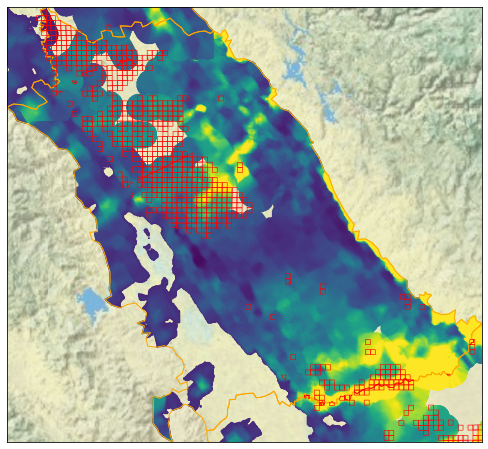

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(15,8))

i = 3 # 3 for san joaquin

# Create a Basemap object
# m = Basemap(llcrnrlon=-124.6509,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=41,
#             resolution='l',epsg=4326)
m = Basemap(llcrnrlon=HR.bounds.iloc[i].minx,llcrnrlat=HR.bounds.iloc[i].miny,urcrnrlon=HR.bounds.iloc[i].maxx,urcrnrlat=HR.bounds.iloc[i].maxy,
            resolution='l',epsg=4326)

# Add the ArcGIS imagery to the map
# m.arcgisimage(service='World_Imagery', xpixels=1000)
# m.arcgisimage(service='NatGeo_World_Map', xpixels=1000)
# m.arcgisimage(service='World_Shaded_Relief', xpixels=1000)
# m.arcgisimage(service='World_Topo_Map', xpixels=1000)
m.arcgisimage(service='World_Physical_Map', xpixels=1000)

out = plt.scatter(
    gdf_dar['geometry'].x, gdf_dar['geometry'].y, c=gdf_dar.Resistivit, 
    s=.7, 
    # cmap=cmap,
    # norm=norm,
    zorder=1
)

# Plot the shapefile using geopandas.plot() method
HR.plot(ax=plt.gca(), facecolor='none', edgecolor='orange', linewidth=1)

# Plot the shapefile using geopandas.plot() method
gdf_gwpa_lch.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=.6)

# Save the map as a PNG file
# plt.savefig('exported_image/study_area_wt_basemap.png', dpi=300, bbox_inches='tight')

# Show the map
plt.show()



/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


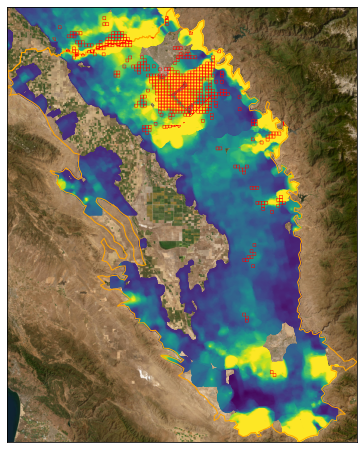

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(15,8))

i = 4 # 3 for san joaquin

# Create a Basemap object
# m = Basemap(llcrnrlon=-124.6509,llcrnrlat=34,urcrnrlon=-118,urcrnrlat=41,
#             resolution='l',epsg=4326)
m = Basemap(llcrnrlon=HR.bounds.iloc[i].minx,llcrnrlat=HR.bounds.iloc[i].miny,urcrnrlon=HR.bounds.iloc[i].maxx,urcrnrlat=HR.bounds.iloc[i].maxy,
            resolution='l',epsg=4326)

# Add the ArcGIS imagery to the map
m.arcgisimage(service='World_Imagery', xpixels=1000)
# m.arcgisimage(service='NatGeo_World_Map', xpixels=1000)
# m.arcgisimage(service='World_Shaded_Relief', xpixels=1000)
# m.arcgisimage(service='World_Topo_Map', xpixels=1000)
# m.arcgisimage(service='World_Physical_Map', xpixels=1000)

out = plt.scatter(
    gdf_dar['geometry'].x, gdf_dar['geometry'].y, c=gdf_dar.Resistivit, 
    s=.7, 
    # cmap=cmap,
    # norm=norm,
    zorder=1
)

# Plot the shapefile using geopandas.plot() method
HR.plot(ax=plt.gca(), facecolor='none', edgecolor='orange', linewidth=1)

# Plot the shapefile using geopandas.plot() method
gdf_gwpa_lch.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=.5)

# Save the map as a PNG file
# plt.savefig('exported_image/study_area_wt_basemap.png', dpi=300, bbox_inches='tight')

# Show the map
plt.show()



In [ ]:
HR.bounds # returns a dataframe with columns minx, miny, maxx, maxy for each geometry
HR.total_bounds

array([-122.62640529,   34.91038025, -118.5821985 ,   40.67770683])

In [ ]:
HR.bounds.iloc[0].minx

-121.85625215233478

In [ ]:
os.getcwd()

'/content/drive/MyDrive/00_Research_Projects/GW_attribution/Colab'

In [ ]:
filtered_resistivity_points = gdf_dar[gdf_dar.Resistivit > 20]


In [ ]:

from shapely.geometry import MultiPoint

multi_point = MultiPoint(filtered_resistivity_points.geometry.apply(lambda x: (x.x, x.y)).tolist())
convex_hull = multi_point.convex_hull



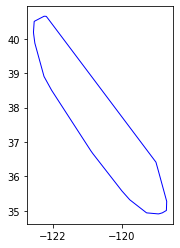

In [ ]:
gwpa_polygon = gdf_gwpa_lch.iloc[0].geometry
convex_hull_inside_gwpa = convex_hull.within(gwpa_polygon)

if not convex_hull_inside_gwpa:
    convex_hull_gdf = gpd.GeoDataFrame(geometry=[convex_hull])
    convex_hull_gdf.plot(ax=plt.gca(), facecolor='none', edgecolor='blue', linewidth=1)



/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


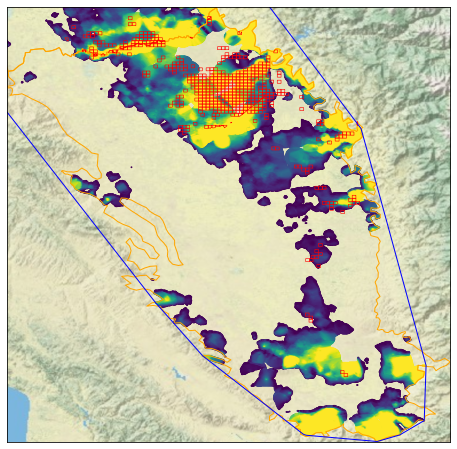

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(15,8))

i = 4

# Create a Basemap object
m = Basemap(llcrnrlon=HR.bounds.iloc[i].minx,llcrnrlat=HR.bounds.iloc[i].miny,urcrnrlon=HR.bounds.iloc[i].maxx,urcrnrlat=HR.bounds.iloc[i].maxy,
            resolution='l',epsg=4326)

# Add the ArcGIS imagery to the map
m.arcgisimage(service='World_Physical_Map', xpixels=1000)

filtered_resistivity_points = gdf_dar[gdf_dar.Resistivit > 20]
gwpa_polygon = gdf_gwpa_lch.iloc[0].geometry

filtered_resistivity_points = filtered_resistivity_points[~filtered_resistivity_points.geometry.within(gwpa_polygon)]

out = plt.scatter(
    filtered_resistivity_points['geometry'].x, filtered_resistivity_points['geometry'].y, c=filtered_resistivity_points.Resistivit, 
    s=.7, 
    zorder=1
)

# Plot the shapefile using geopandas.plot() method
HR.plot(ax=plt.gca(), facecolor='none', edgecolor='orange', linewidth=1)

# Plot the shapefile using geopandas.plot() method
gdf_gwpa_lch.plot(ax=plt.gca(), facecolor='none', edgecolor='red', linewidth=.6)

multi_point = MultiPoint(filtered_resistivity_points.geometry.apply(lambda x: (x.x, x.y)).tolist())
convex_hull = multi_point.convex_hull

convex_hull_inside_gwpa = convex_hull.within(gwpa_polygon)

if not convex_hull_inside_gwpa:
    convex_hull_gdf = gpd.GeoDataFrame(geometry=[convex_hull])
    convex_hull_gdf.plot(ax=plt.gca(), facecolor='none', edgecolor='blue', linewidth=1)

# Show the map
plt.show()
